In [2]:
from pymongo import MongoClient 
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt

Import cleaned csv (duplicate "state_code.1" columns must be dropped in order to avoid conflict) to MONGO db by running the following command in your terminal:

mongoimport --type csv -d startups -c startup_data --headerline --drop /Users/rexpeters/Desktop/project3/startup_data_cleaned.csv

In [3]:
mongo = MongoClient(port=27017) 

In [4]:
print(mongo.list_database_names()) 

['admin', 'autosaurus', 'classDB', 'config', 'epa', 'fruits_DB', 'local', 'met', 'petsitly_marketing', 'startups', 'travel_db', 'uk_food']


In [5]:
db = mongo['startups']

In [6]:
print(db.list_collection_names()) 

['startup_data']


In [7]:
startup_data = db['startup_data']

In [8]:
startup_data.find_one()

{'_id': ObjectId('673be07f87b8a545ddd0ff6d'),
 'Unnamed: 0': 738,
 'state_code': 'CA',
 'latitude': 37.320309,
 'longitude': -122.05004,
 'zip_code': 95014,
 'id': 'c:42668',
 'city': 'Cupertino',
 'Unnamed: 6': 'Cupertino CA 95014',
 'name': 'Solidcore Systems',
 'labels': 1,
 'founded_at': '1/1/2002',
 'closed_at': '',
 'first_funding_at': '2/17/2005',
 'last_funding_at': '4/25/2007',
 'age_first_funding_year': 3.1315,
 'age_last_funding_year': 5.3151,
 'age_first_milestone_year': 6.0027,
 'age_last_milestone_year': 6.0027,
 'relationships': 5,
 'funding_rounds': 3,
 'funding_total_usd': 40000000,
 'milestones': 1,
 'is_CA': 1,
 'is_NY': 0,
 'is_MA': 0,
 'is_TX': 0,
 'is_otherstate': 0,
 'category_code': 'software',
 'is_software': 1,
 'is_web': 0,
 'is_mobile': 0,
 'is_enterprise': 0,
 'is_advertising': 0,
 'is_gamesvideo': 0,
 'is_ecommerce': 0,
 'is_biotech': 0,
 'is_consulting': 0,
 'is_othercategory': 0,
 'object_id': 'c:42668',
 'has_VC': 0,
 'has_angel': 0,
 'has_roundA': 0,
 

In [9]:
print(type(startup_data))
print(startup_data)

<class 'pymongo.synchronous.collection.Collection'>
Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'startups'), 'startup_data')


In [68]:
data = list(startup_data.find())  # Convert MongoDB cursor to a list
dataframe = pd.DataFrame(data)

In [11]:
len(dataframe)

923

In [57]:
# Create separate DataFrames for each column where the value is 1
web_df = dataframe[dataframe["is_web"] == 1]
software_df = dataframe[dataframe["is_software"] == 1]
mobile_df = dataframe[dataframe["is_mobile"] == 1]
enterprise_df = dataframe[dataframe["is_enterprise"] == 1]
advertising_df = dataframe[dataframe["is_advertising"] == 1]
gamesvideo_df = dataframe[dataframe["is_gamesvideo"] == 1]
ecommerce_df = dataframe[dataframe["is_ecommerce"] == 1]
biotech_df = dataframe[dataframe["is_biotech"] == 1]
consulting_df = dataframe[dataframe["is_consulting"] == 1]
othercategory_df = dataframe[dataframe["is_othercategory"] == 1]
consulting_df.head(30)

,_id,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
57,673be07f87b8a545ddd0ffa6,320,CA,33.584282,-117.730682,92656,c:19257,Aliso Viejo,,Enclarity,...,c:19257,0,0,0,0,1,0,2.0,1,acquired
397,673be07f87b8a545ddd100fa,76,MA,42.346743,-71.076632,2116,c:1285,Boston,,Compete,...,c:1285,1,0,1,1,1,0,2.5,1,acquired
882,673be07f87b8a545ddd102df,604,TX,32.960431,-96.830260,75001,c:34267,Addison,Addison TX 75001,Chronicity,...,c:34267,1,0,1,0,0,0,1.0,1,closed


In [23]:
# Print the length of each DataFrame
print(f"Length of web_df: {len(web_df)}")
print(f"Length of software_df: {len(software_df)}")
print(f"Length of mobile_df: {len(mobile_df)}")
print(f"Length of enterprise_df: {len(enterprise_df)}")
print(f"Length of advertising_df: {len(advertising_df)}")
print(f"Length of gamesvideo_df: {len(gamesvideo_df)}")
print(f"Length of ecommerce_df: {len(ecommerce_df)}")
print(f"Length of biotech_df: {len(biotech_df)}")
print(f"Length of consulting_df: {len(consulting_df)}")
print(f"Length of othercategory_df: {len(othercategory_df)}")


Length of web_df: 144
Length of software_df: 153
Length of mobile_df: 79
Length of enterprise_df: 73
Length of advertising_df: 62
Length of gamesvideo_df: 52
Length of ecommerce_df: 25
Length of biotech_df: 34
Length of consulting_df: 3
Length of othercategory_df: 298


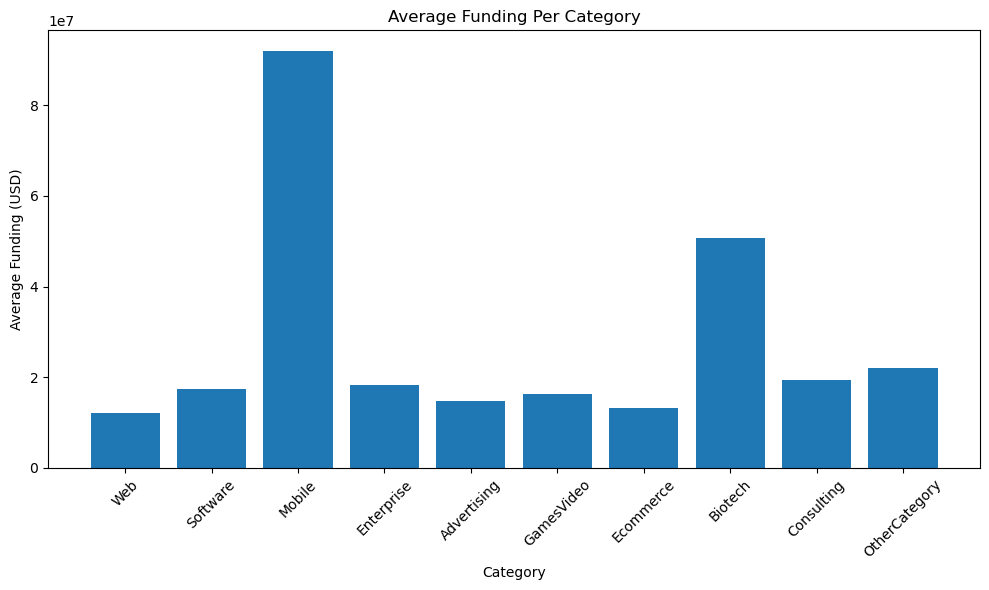

In [24]:
# Calculate the average funding for each category
average_funding = {
    "Web": web_df["funding_total_usd"].mean(),
    "Software": software_df["funding_total_usd"].mean(),
    "Mobile": mobile_df["funding_total_usd"].mean(),
    "Enterprise": enterprise_df["funding_total_usd"].mean(),
    "Advertising": advertising_df["funding_total_usd"].mean(),
    "GamesVideo": gamesvideo_df["funding_total_usd"].mean(),
    "Ecommerce": ecommerce_df["funding_total_usd"].mean(),
    "Biotech": biotech_df["funding_total_usd"].mean(),
    "Consulting": consulting_df["funding_total_usd"].mean(),
    "OtherCategory": othercategory_df["funding_total_usd"].mean(),
}

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(average_funding.keys(), average_funding.values())
plt.title("Average Funding Per Category")
plt.xlabel("Category")
plt.ylabel("Average Funding (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


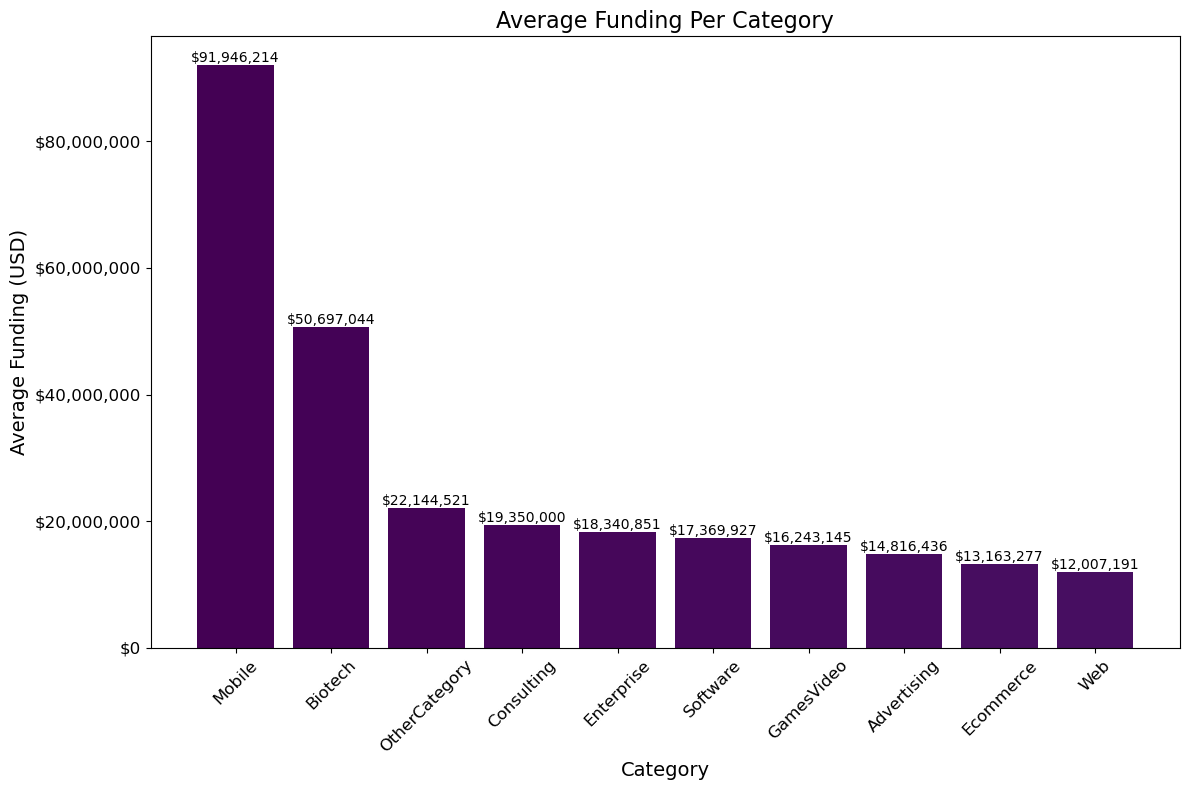

In [31]:
import matplotlib.pyplot as plt

# Calculate the average funding for each category
average_funding = {
    "Web": web_df["funding_total_usd"].mean(),
    "Software": software_df["funding_total_usd"].mean(),
    "Mobile": mobile_df["funding_total_usd"].mean(),
    "Enterprise": enterprise_df["funding_total_usd"].mean(),
    "Advertising": advertising_df["funding_total_usd"].mean(),
    "GamesVideo": gamesvideo_df["funding_total_usd"].mean(),
    "Ecommerce": ecommerce_df["funding_total_usd"].mean(),
    "Biotech": biotech_df["funding_total_usd"].mean(),
    "Consulting": consulting_df["funding_total_usd"].mean(),
    "OtherCategory": othercategory_df["funding_total_usd"].mean(),
}

# Sort categories by average funding
average_funding = dict(sorted(average_funding.items(), key=lambda item: item[1], reverse=True))

# Create a bar graph
plt.figure(figsize=(12, 8))
bars = plt.bar(average_funding.keys(), average_funding.values(), color=plt.cm.viridis(range(len(average_funding))))

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"${height:,.0f}", ha='center', va='bottom', fontsize=10)

# Customize the graph
plt.title("Average Funding Per Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Average Funding (USD)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.tight_layout()

# Show the graph
plt.show()


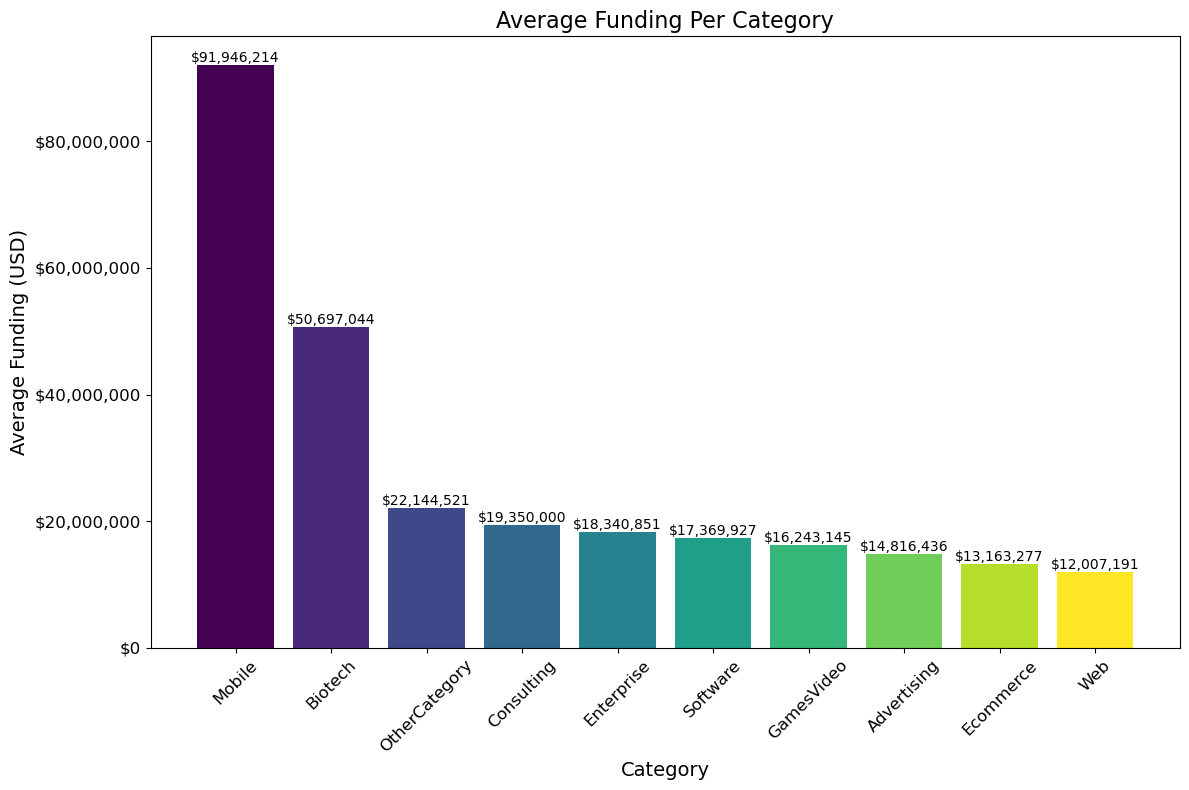

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the average funding for each category
average_funding = {
    "Web": web_df["funding_total_usd"].mean(),
    "Software": software_df["funding_total_usd"].mean(),
    "Mobile": mobile_df["funding_total_usd"].mean(),
    "Enterprise": enterprise_df["funding_total_usd"].mean(),
    "Advertising": advertising_df["funding_total_usd"].mean(),
    "GamesVideo": gamesvideo_df["funding_total_usd"].mean(),
    "Ecommerce": ecommerce_df["funding_total_usd"].mean(),
    "Biotech": biotech_df["funding_total_usd"].mean(),
    "Consulting": consulting_df["funding_total_usd"].mean(),
    "OtherCategory": othercategory_df["funding_total_usd"].mean(),
}

# Sort categories by average funding
average_funding = dict(sorted(average_funding.items(), key=lambda item: item[1], reverse=True))

# Generate a color for each bar using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(average_funding)))

# Create a bar graph
plt.figure(figsize=(12, 8))
bars = plt.bar(average_funding.keys(), average_funding.values(), color=colors)

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"${height:,.0f}", ha='center', va='bottom', fontsize=10)

# Customize the graph
plt.title("Average Funding Per Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Average Funding (USD)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.tight_layout()

# Show the graph
plt.show()


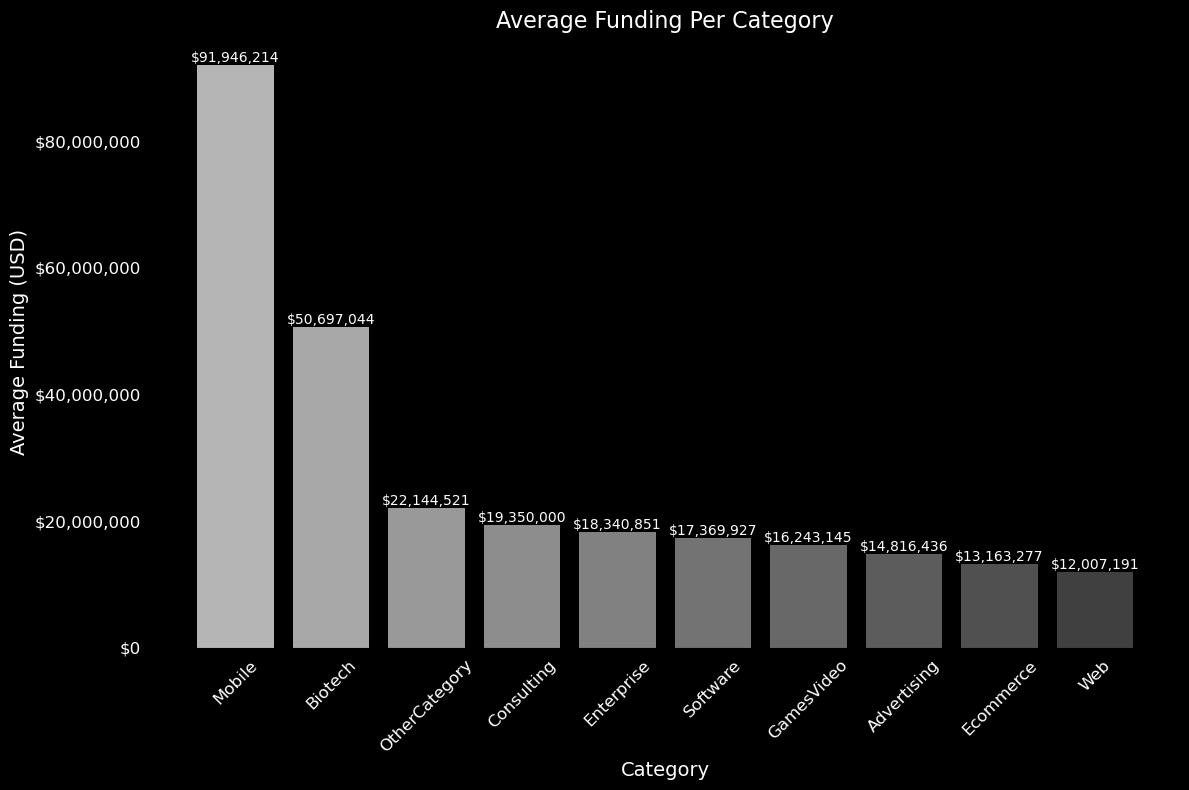

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the average funding for each category
average_funding = {
    "Web": web_df["funding_total_usd"].mean(),
    "Software": software_df["funding_total_usd"].mean(),
    "Mobile": mobile_df["funding_total_usd"].mean(),
    "Enterprise": enterprise_df["funding_total_usd"].mean(),
    "Advertising": advertising_df["funding_total_usd"].mean(),
    "GamesVideo": gamesvideo_df["funding_total_usd"].mean(),
    "Ecommerce": ecommerce_df["funding_total_usd"].mean(),
    "Biotech": biotech_df["funding_total_usd"].mean(),
    "Consulting": consulting_df["funding_total_usd"].mean(),
    "OtherCategory": othercategory_df["funding_total_usd"].mean(),
}

# Sort categories by average funding
average_funding = dict(sorted(average_funding.items(), key=lambda item: item[1], reverse=True))

# Generate grayscale colors for the bars
colors = plt.cm.Greys(np.linspace(0.4, 0.8, len(average_funding)))  # Lighter greyscale tones

# Create a bar graph with a black background
plt.figure(figsize=(12, 8), facecolor="black")
bars = plt.bar(average_funding.keys(), average_funding.values(), color=colors)

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"${height:,.0f}", ha='center', va='bottom', fontsize=10, color="white")

# Customize the graph
plt.title("Average Funding Per Category", fontsize=16, color="white")
plt.xlabel("Category", fontsize=14, color="white")
plt.ylabel("Average Funding (USD)", fontsize=14, color="white")
plt.xticks(rotation=45, fontsize=12, color="white")
plt.yticks(fontsize=12, color="white")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Set black background for the plot
plt.gca().set_facecolor("black")
plt.tight_layout()

# Show & save the graph
plt.savefig("average_funding_black_background.png", dpi=300, bbox_inches="tight", facecolor="black")

plt.show()


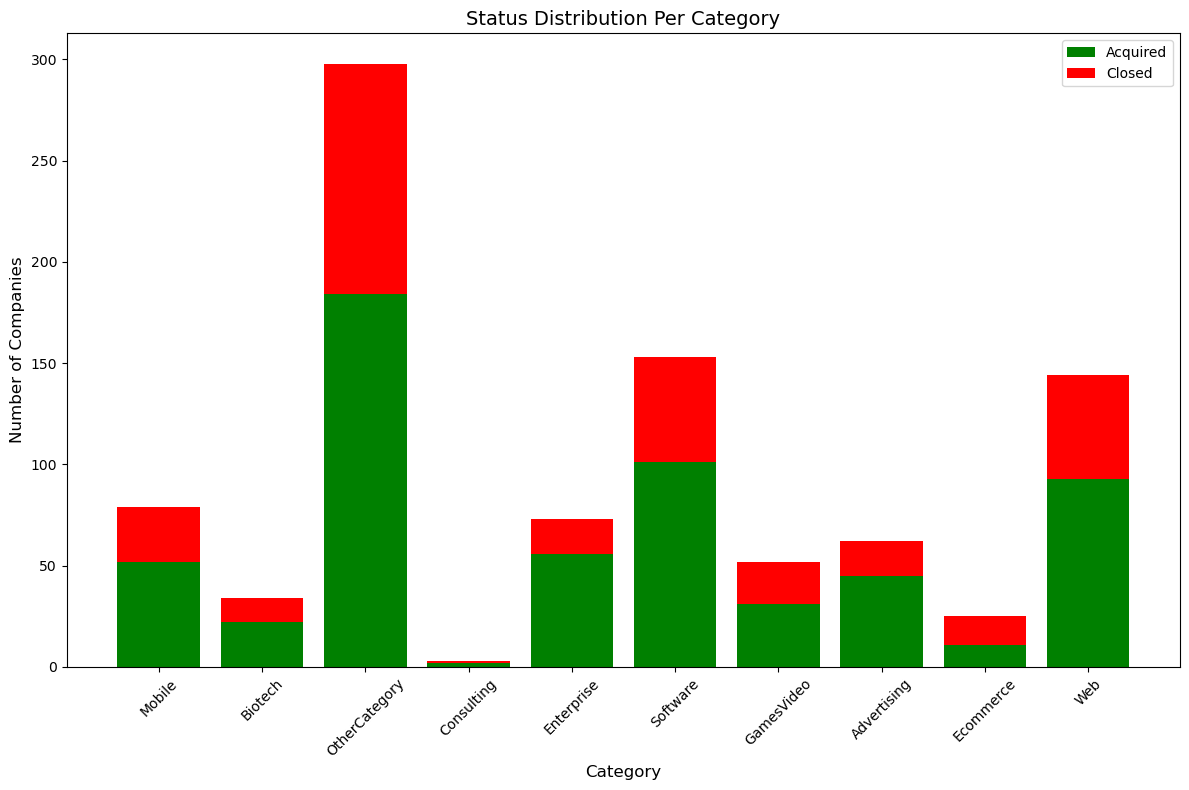

In [34]:
import matplotlib.pyplot as plt

# List of categories in the desired order
categories = [
    ("Mobile", mobile_df),
    ("Biotech", biotech_df),
    ("OtherCategory", othercategory_df),
    ("Consulting", consulting_df),
    ("Enterprise", enterprise_df),
    ("Software", software_df),
    ("GamesVideo", gamesvideo_df),
    ("Advertising", advertising_df),
    ("Ecommerce", ecommerce_df),
    ("Web", web_df)
]

# Calculate counts of "acquired" and "closed" for each category
acquired_counts = []
closed_counts = []
percentages = []

for category, df in categories:
    acquired = len(df[df["status"] == "acquired"])
    closed = len(df[df["status"] == "closed"])
    total = acquired + closed
    acquired_counts.append(acquired)
    closed_counts.append(closed)
    percentages.append((acquired / total * 100 if total > 0 else 0, closed / total * 100 if total > 0 else 0))

# Plotting the stacked bar chart
x = [category for category, df in categories]  # Category names for x-axis
plt.figure(figsize=(12, 8))
bar1 = plt.bar(x, acquired_counts, label="Acquired", color="green")
bar2 = plt.bar(x, closed_counts, bottom=acquired_counts, label="Closed", color="red")

# Customizing the plot
plt.title("Status Distribution Per Category", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of Companies", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()


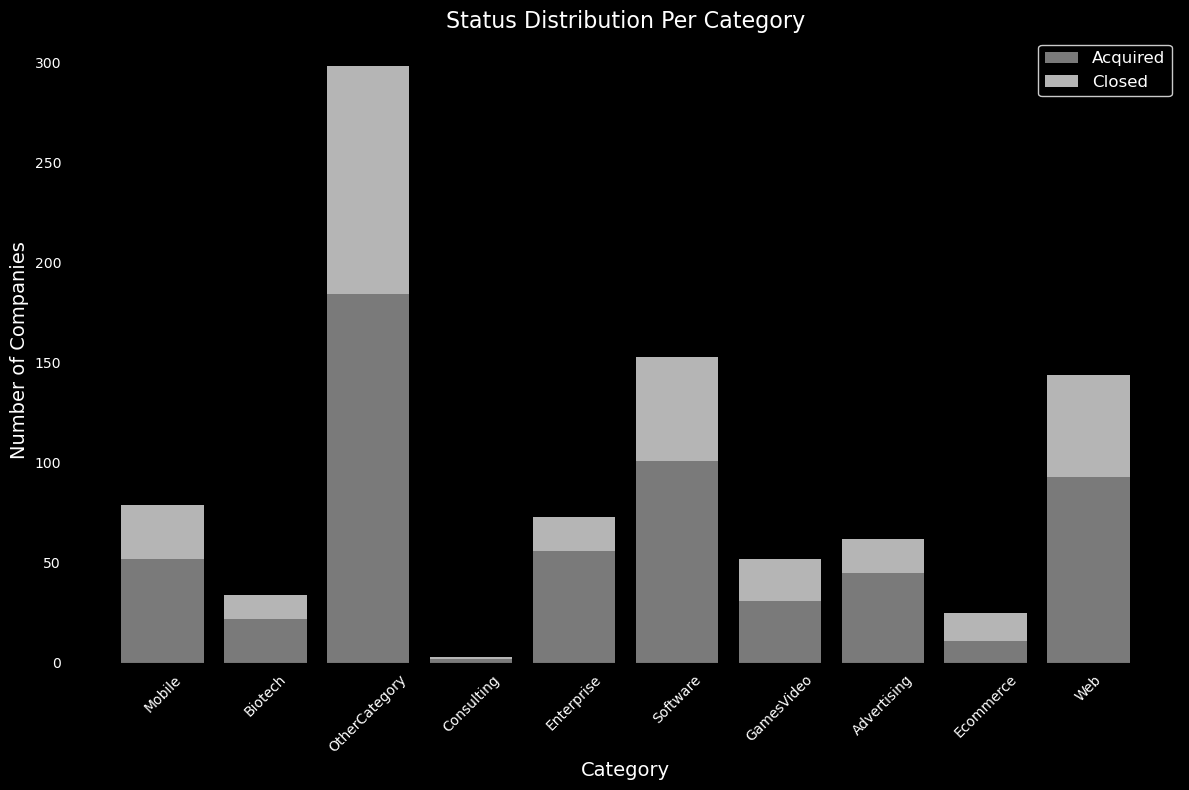

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# List of categories in the desired order
categories = [
    ("Mobile", mobile_df),
    ("Biotech", biotech_df),
    ("OtherCategory", othercategory_df),
    ("Consulting", consulting_df),
    ("Enterprise", enterprise_df),
    ("Software", software_df),
    ("GamesVideo", gamesvideo_df),
    ("Advertising", advertising_df),
    ("Ecommerce", ecommerce_df),
    ("Web", web_df)
]

# Calculate counts of "acquired" and "closed" for each category
acquired_counts = []
closed_counts = []

for category, df in categories:
    acquired = len(df[df["status"] == "acquired"])
    closed = len(df[df["status"] == "closed"])
    acquired_counts.append(acquired)
    closed_counts.append(closed)

# Generate grayscale colors for the bars
colors_acquired = plt.cm.Greys(0.6)  # Gray for "Acquired"
colors_closed = plt.cm.Greys(0.4)    # Darker gray for "Closed"

# Plotting the stacked bar chart
x = [category for category, df in categories]  # Category names for x-axis
plt.figure(figsize=(12, 8), facecolor="black")
bar1 = plt.bar(x, acquired_counts, label="Acquired", color=colors_acquired)
bar2 = plt.bar(x, closed_counts, bottom=acquired_counts, label="Closed", color=colors_closed)

# Customizing the plot
plt.title("Status Distribution Per Category", fontsize=16, color="white")
plt.xlabel("Category", fontsize=14, color="white")
plt.ylabel("Number of Companies", fontsize=14, color="white")
plt.xticks(rotation=45, color="white")
plt.yticks(color="white")

# Customize legend with white text
legend = plt.legend(facecolor="black", edgecolor="white", fontsize=12)
for text in legend.get_texts():
    text.set_color("white")

# Set black background for the plot area
plt.gca().set_facecolor("black")
plt.tight_layout()

# Save the figure
plt.savefig("status_distribution_black_background.png", dpi=300, bbox_inches="tight", facecolor="black")

# Show the plot
plt.show()


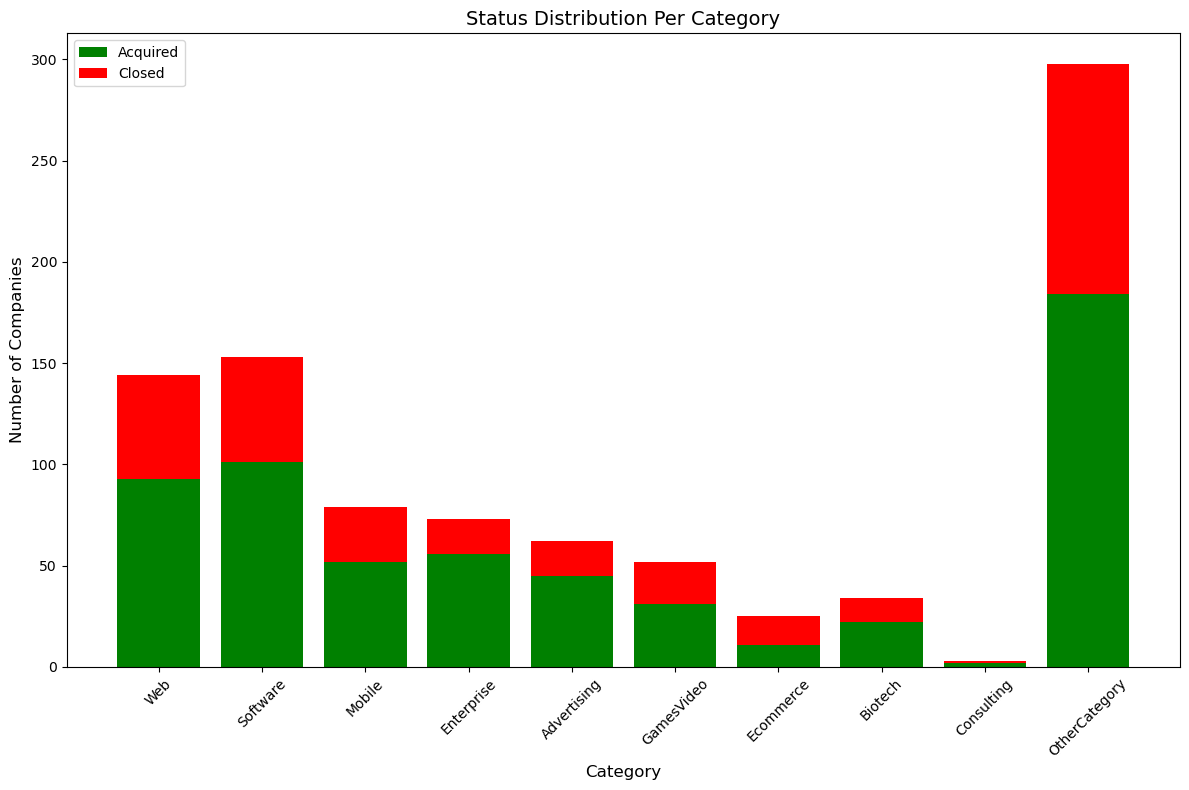

In [32]:
import matplotlib.pyplot as plt

# List of categories
categories = [
    ("Web", web_df),
    ("Software", software_df),
    ("Mobile", mobile_df),
    ("Enterprise", enterprise_df),
    ("Advertising", advertising_df),
    ("GamesVideo", gamesvideo_df),
    ("Ecommerce", ecommerce_df),
    ("Biotech", biotech_df),
    ("Consulting", consulting_df),
    ("OtherCategory", othercategory_df)
]

# Calculate counts of "acquired" and "closed" for each category
acquired_counts = []
closed_counts = []
percentages = []

for category, df in categories:
    acquired = len(df[df["status"] == "acquired"])
    closed = len(df[df["status"] == "closed"])
    total = acquired + closed
    acquired_counts.append(acquired)
    closed_counts.append(closed)
    percentages.append((acquired / total * 100 if total > 0 else 0, closed / total * 100 if total > 0 else 0))

# Plotting the stacked bar chart
x = [category for category, df in categories]  # Category names for x-axis
plt.figure(figsize=(12, 8))
bar1 = plt.bar(x, acquired_counts, label="Acquired", color="green")
bar2 = plt.bar(x, closed_counts, bottom=acquired_counts, label="Closed", color="red")



# Customizing the plot
plt.title("Status Distribution Per Category", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of Companies", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()


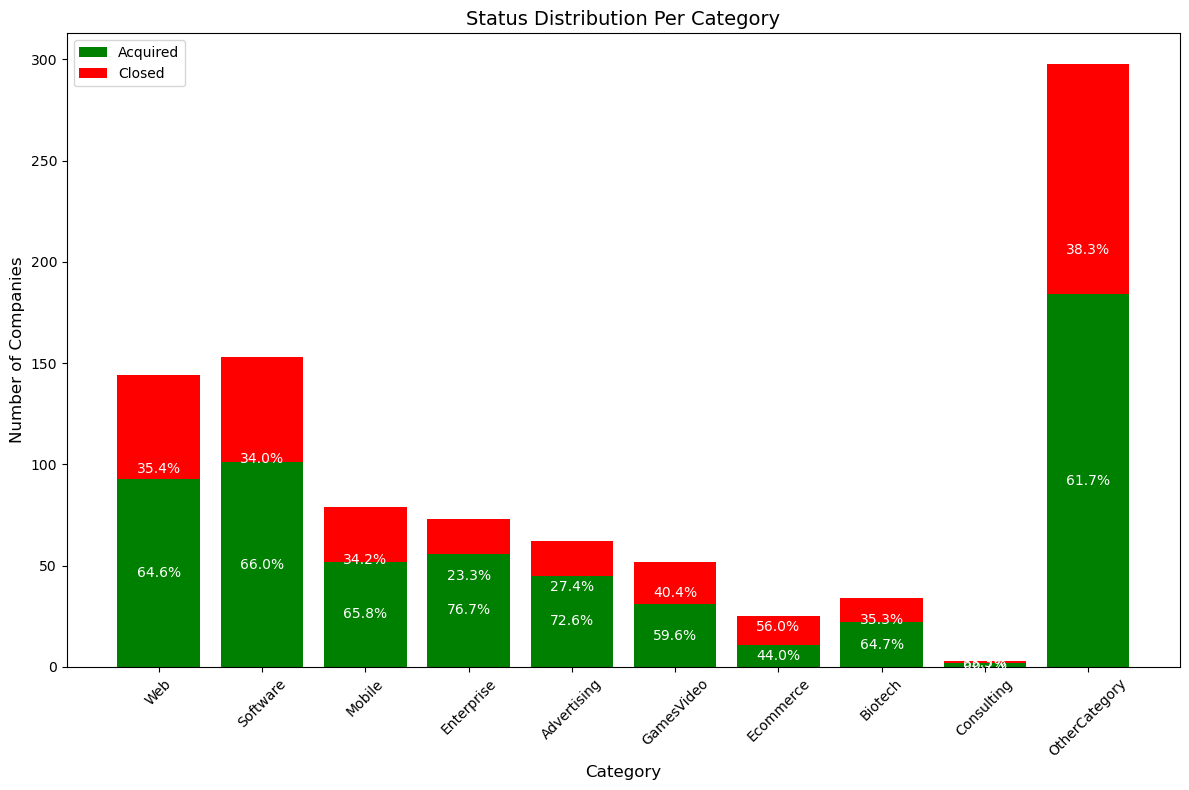

In [35]:
import matplotlib.pyplot as plt

# List of categories
categories = [
    ("Web", web_df),
    ("Software", software_df),
    ("Mobile", mobile_df),
    ("Enterprise", enterprise_df),
    ("Advertising", advertising_df),
    ("GamesVideo", gamesvideo_df),
    ("Ecommerce", ecommerce_df),
    ("Biotech", biotech_df),
    ("Consulting", consulting_df),
    ("OtherCategory", othercategory_df)
]

# Calculate counts of "acquired" and "closed" for each category
acquired_counts = []
closed_counts = []
percentages = []

for category, df in categories:
    acquired = len(df[df["status"] == "acquired"])
    closed = len(df[df["status"] == "closed"])
    total = acquired + closed
    acquired_counts.append(acquired)
    closed_counts.append(closed)
    percentages.append((acquired / total * 100 if total > 0 else 0, closed / total * 100 if total > 0 else 0))

# Plotting the stacked bar chart
x = [category for category, df in categories]  # Category names for x-axis
plt.figure(figsize=(12, 8))
bar1 = plt.bar(x, acquired_counts, label="Acquired", color="green")
bar2 = plt.bar(x, closed_counts, bottom=acquired_counts, label="Closed", color="red")

# Annotating percentages on the bars
for i, (bar, percent) in enumerate(zip(bar1, percentages)):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f"{percent[0]:.1f}%", ha='center', va='center', color="white", fontsize=10)

for i, (bar, percent) in enumerate(zip(bar2, percentages)):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + acquired_counts[i] / 2, f"{percent[1]:.1f}%", ha='center', va='center', color="white", fontsize=10)

# Customizing the plot
plt.title("Status Distribution Per Category", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of Companies", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()


/var/folders/fr/k0g1psmj1kg7d4hq5ww_6drw0000gn/T/ipykernel_6278/1633615422.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/fr/k0g1psmj1kg7d4hq5ww_6drw0000gn/T/ipykernel_6278/1633615422.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



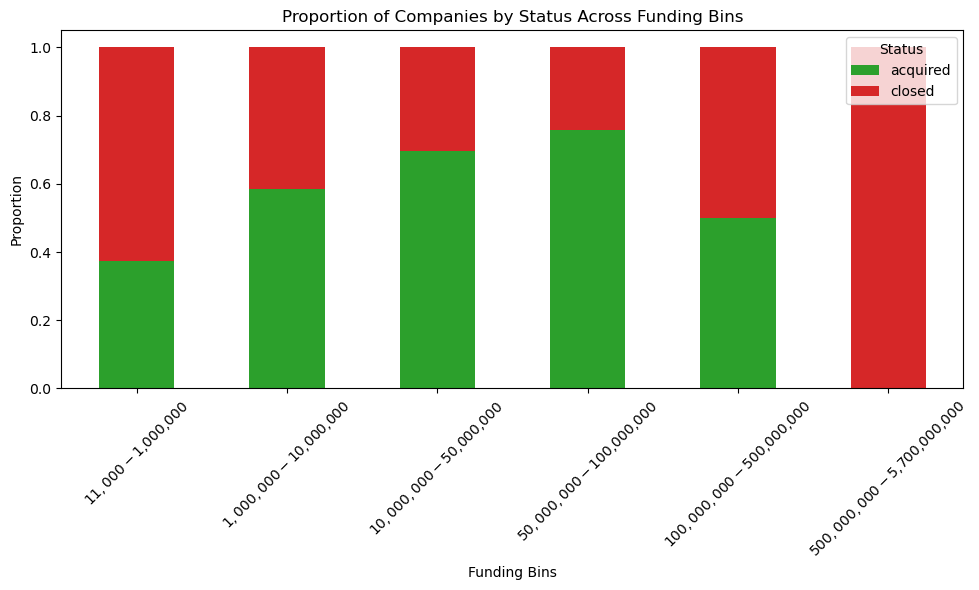

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Define custom hard-coded bins
bins = [11000, 1000000, 10000000, 50000000, 100000000, 500000000, 5700000000]
labels = [f"${bins[i]:,} - ${bins[i+1]:,}" for i in range(len(bins) - 1)]

# Create a new column for the funding bin categories
df['funding_bin'] = pd.cut(df["funding_total_usd"], bins=bins, labels=labels, include_lowest=True)

# Count the occurrences of 'acquired' and 'closed' status for each funding bin
status_counts = df.groupby(['funding_bin', 'status']).size().unstack(fill_value=0)

# Normalize the counts to proportions
status_proportions = status_counts.div(status_counts.sum(axis=1), axis=0)

# Define custom colors for the bars
custom_colors = ["#2ca02c", "#d62728"]  # Green for 'acquired', Red for 'closed'

# Plot the stacked bar chart with custom colors
status_proportions.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    color=custom_colors  # Use the custom colors
)

# Customize the plot
plt.title('Proportion of Companies by Status Across Funding Bins')
plt.xlabel('Funding Bins')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Status', loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()


In [59]:
df = dataframe
df['status'] = df.status.map({'acquired': 1, 'closed': 0}) #convert status column for heatmap


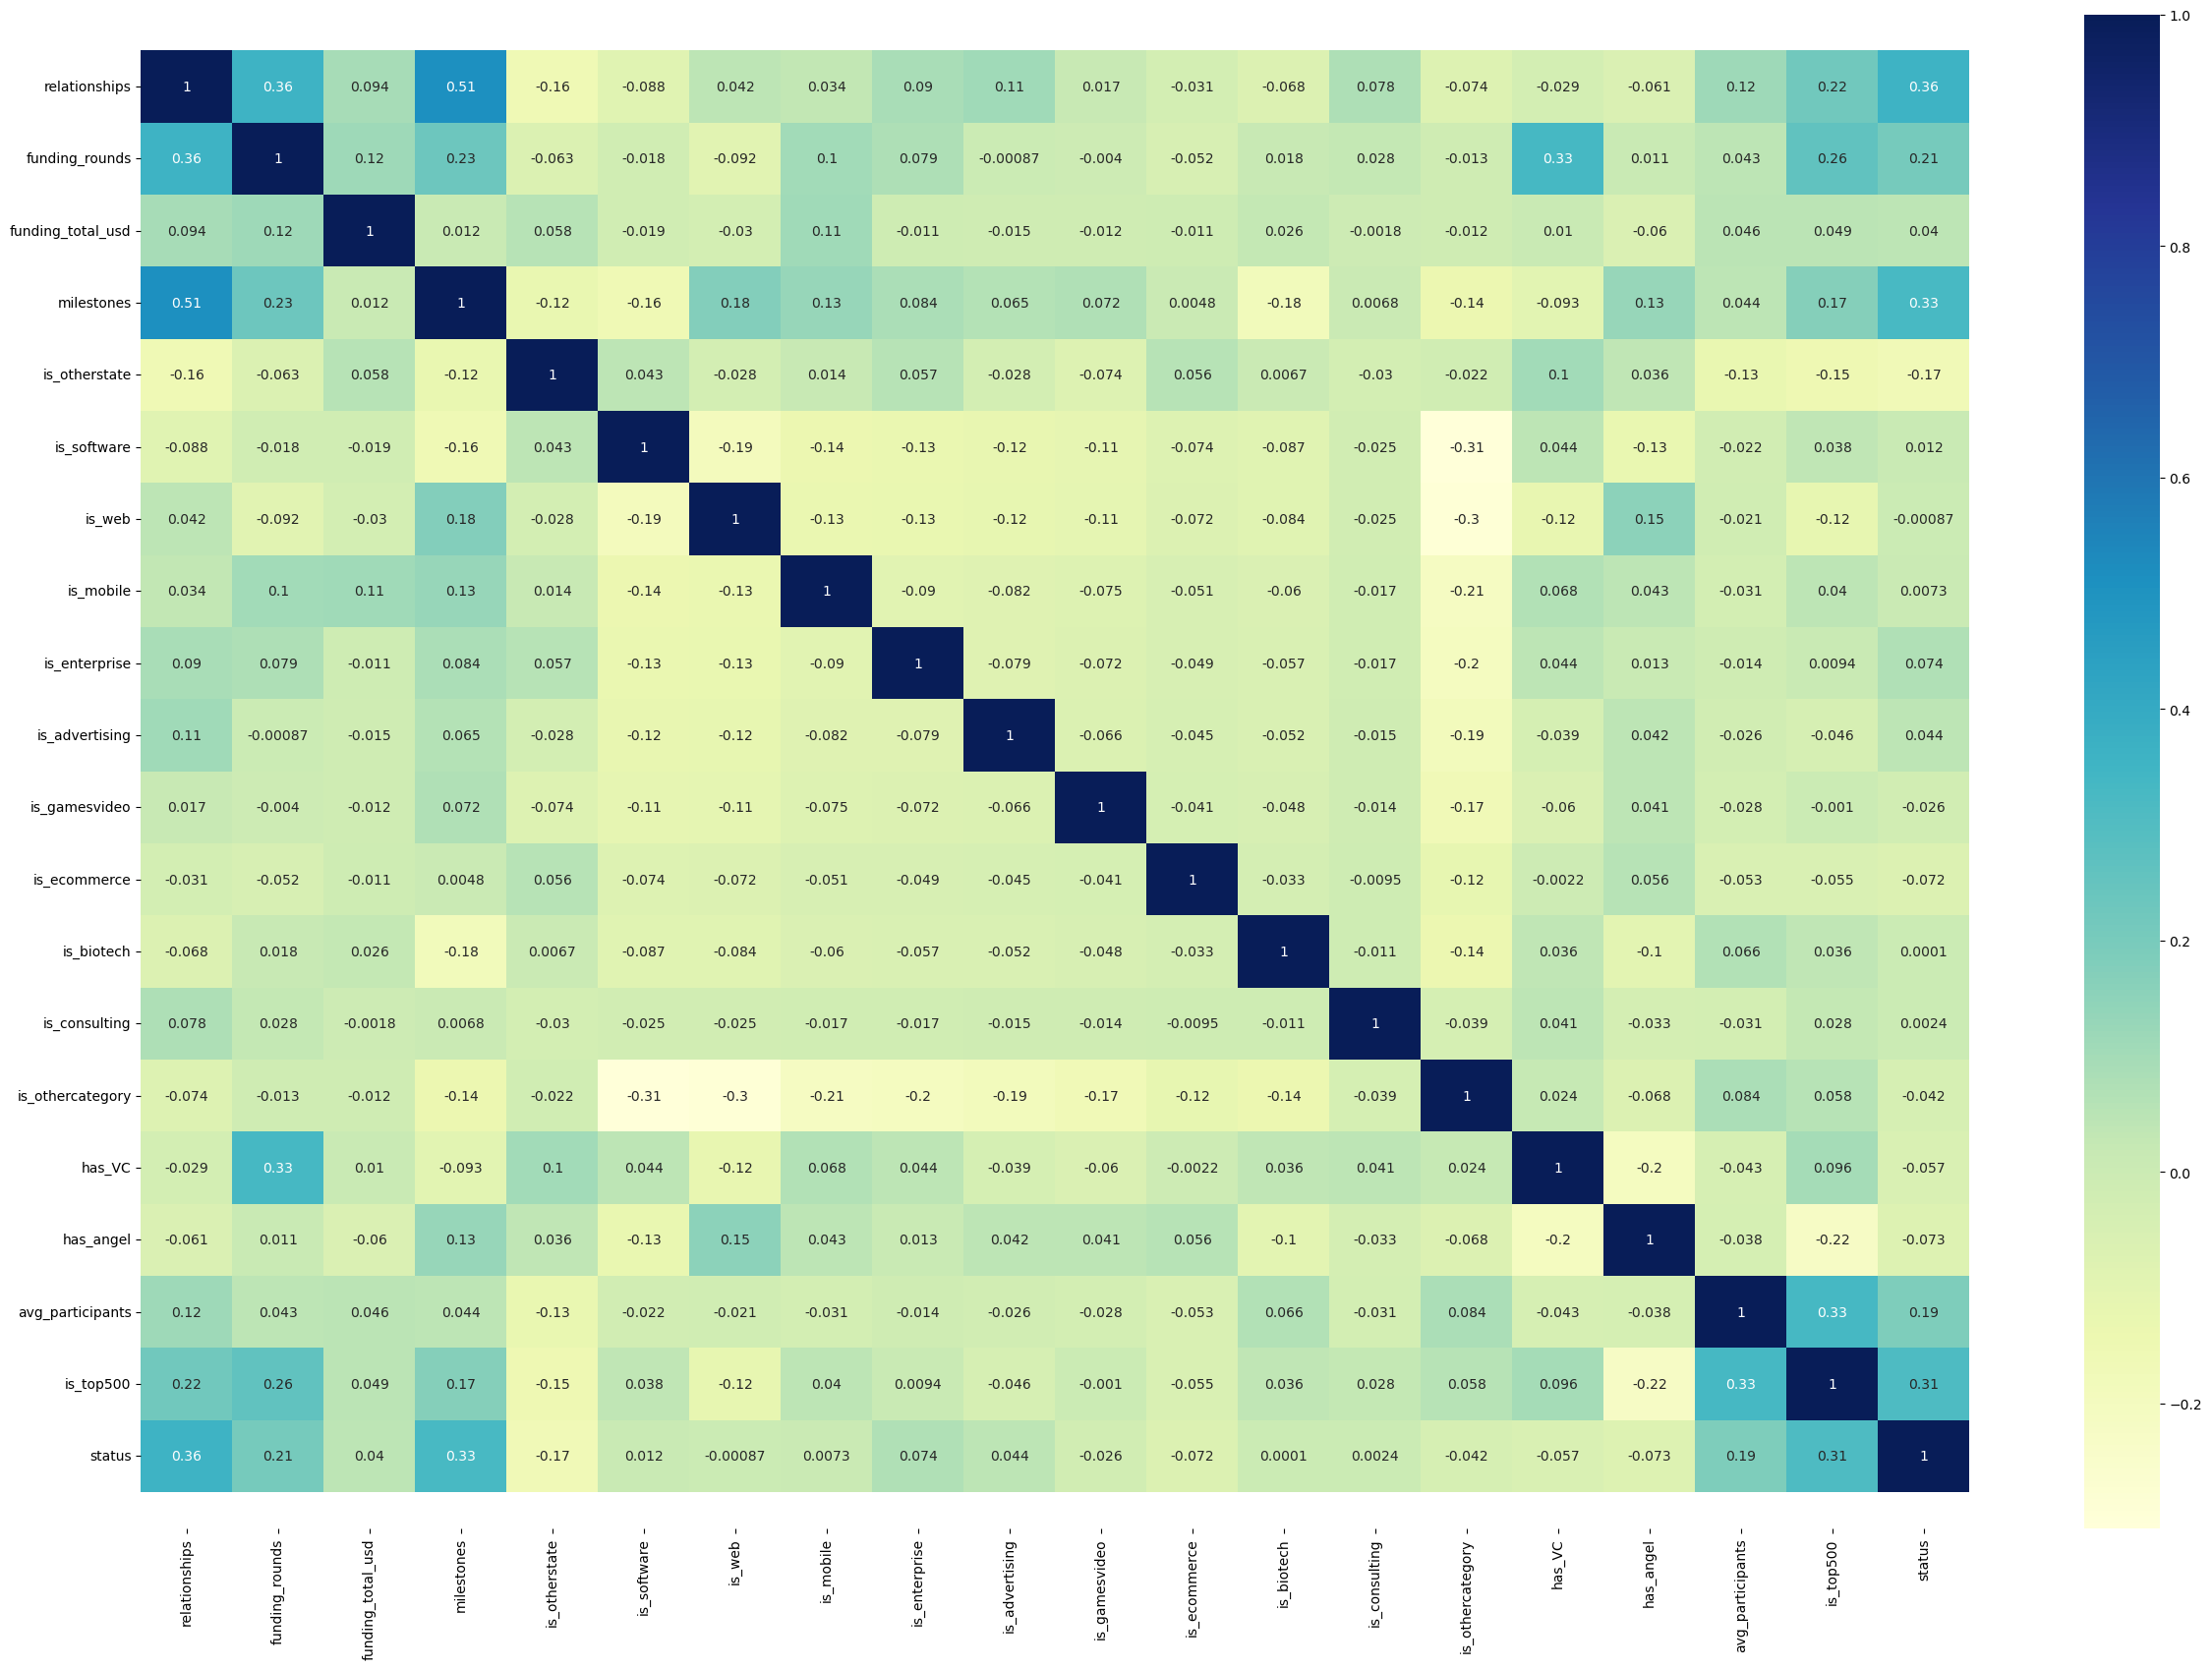

In [60]:
import seaborn as sns

features = ['relationships','funding_rounds','funding_total_usd','milestones','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','has_VC','has_angel','avg_participants','is_top500','status']

plt.figure(figsize=(30,20))
ax = sns.heatmap(data = df[features].corr(),cmap='YlGnBu',annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')


In [69]:
dataframe["milestones"].unique()

array([1, 4, 3, 2, 0, 5, 6, 8])

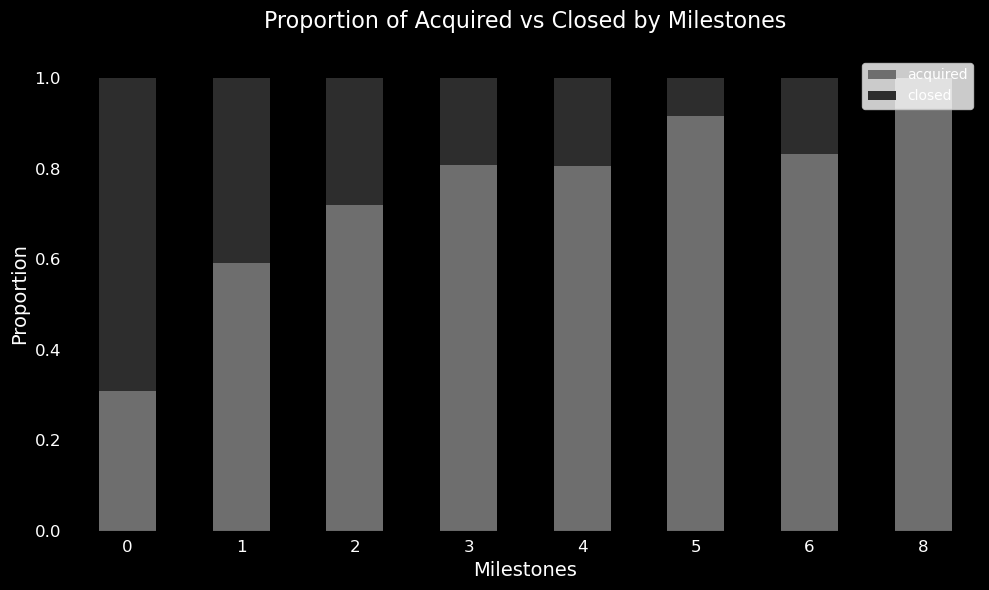

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure milestones are sorted
milestones = sorted(dataframe["milestones"].unique())

# Calculate counts for "acquired" and "closed" statuses for each milestone
status_counts = dataframe.groupby(['milestones', 'status']).size().unstack(fill_value=0)

# Normalize the counts to proportions
status_proportions = status_counts.div(status_counts.sum(axis=1), axis=0)

# Define grayscale colors for the bars
colors = ["#6e6e6e", "#2d2d2d"]  # Light gray for 'acquired', dark gray for 'closed'

# Plot the stacked bar chart
plt.figure(figsize=(10, 6), facecolor="black")
status_proportions.plot(
    kind='bar',
    stacked=True,
    color=colors,
    ax=plt.gca()
)

# Customize the plot
plt.title('Proportion of Acquired vs Closed by Milestones', fontsize=16, color="white", pad=20)
plt.xlabel('Milestones', fontsize=14, color="white")
plt.ylabel('Proportion', fontsize=14, color="white")
plt.xticks(rotation=0, fontsize=12, color="white")
plt.yticks(fontsize=12, color="white")
plt.legend(title='Status', loc='upper right', fontsize=12, title_fontsize=14, facecolor="black", edgecolor="white")

# Customize legend text color
legend = plt.legend()
for text in legend.get_texts():
    text.set_color("white")
legend.get_title().set_color("white")

# Set black background for the plot area
plt.gca().set_facecolor("black")
plt.tight_layout()

# Save the figure
plt.savefig('milestones_acquisition_proportions.png', dpi=300, bbox_inches='tight', facecolor="black")

# Show the plot
plt.show()


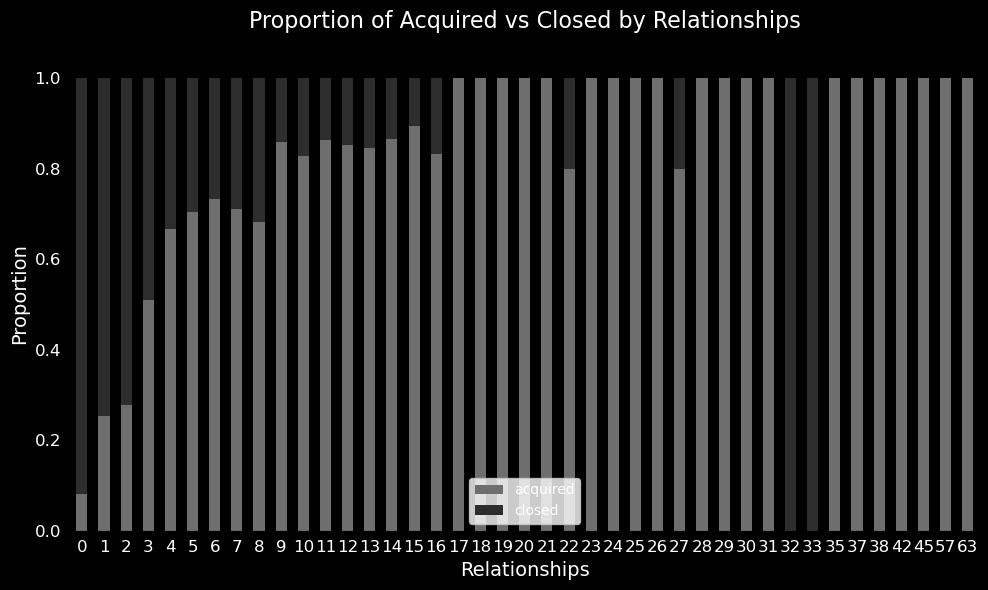

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure relationships are sorted
relationships = sorted(dataframe["relationships"].unique())

# Calculate counts for "acquired" and "closed" statuses for each relationship bin
status_counts = dataframe.groupby(['relationships', 'status']).size().unstack(fill_value=0)

# Normalize the counts to proportions
status_proportions = status_counts.div(status_counts.sum(axis=1), axis=0)

# Define grayscale colors for the bars
colors = ["#6e6e6e", "#2d2d2d"]  # Light gray for 'acquired', dark gray for 'closed'

# Plot the stacked bar chart
plt.figure(figsize=(10, 6), facecolor="black")
status_proportions.plot(
    kind='bar',
    stacked=True,
    color=colors,
    ax=plt.gca()
)

# Customize the plot
plt.title('Proportion of Acquired vs Closed by Relationships', fontsize=16, color="white", pad=20)
plt.xlabel('Relationships', fontsize=14, color="white")
plt.ylabel('Proportion', fontsize=14, color="white")
plt.xticks(rotation=0, fontsize=12, color="white")
plt.yticks(fontsize=12, color="white")
plt.legend(title='Status', loc='upper right', fontsize=12, title_fontsize=14, facecolor="black", edgecolor="white")

# Customize legend text color
legend = plt.legend()
for text in legend.get_texts():
    text.set_color("white")
legend.get_title().set_color("white")

# Set black background for the plot area
plt.gca().set_facecolor("black")
plt.tight_layout()

# Save the figure
plt.savefig('relationships_acquisition_proportions.png', dpi=300, bbox_inches='tight', facecolor="black")

# Show the plot
plt.show()
